In [7]:
def binomial_option(spot: float, strike: float, rate: float, sigma: float, time:float, steps: int, output: int=0):
    """
    Binomial option pricing model for a European call option
    """
    # Define the tree
    ts = time / steps
    u = 1+sigma*np.sqrt(ts)
    v = 1- sigma*np.sqrt(ts)
    p = 0.5 + rate * np.sqrt(ts) / (2 * sigma)
    df = 1/(1+rate*ts)
    
    px = np.zeros((steps+1, steps+1))
    cp = np.zeros((steps+1, steps+1))
    V = np.zeros((steps+1, steps+1))
    d = np.zeros((steps+1, steps+1))
    
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot*np.power(v,i)*np.power(u,j-i)
            cp[i,j] = np.maximum(px[i,j]-strike, 0)
            # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    results = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,4)
    return results[output]

In [3]:
import numpy as np #this should come first

In [8]:
# Asset price
px = binomial_option(100,100,0.05,0.2,1,4,0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [9]:
# Intrinsic value of call options
cp = binomial_option(100,100,0.05,0.2,1,4,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [23]:
sigma_values = np.arange(0.05, 0.80, 0.05)
option_prices = []
header = ['Option Values']

for sigma in sigma_values:
    option_prices.append(binomial_option(100, 100, 0.05, sigma, 1, 4, 2))
    
for i in range(len(option_prices)):
    print(f'{option_prices[i][0,0]:.2f}')

5.13
6.60
8.39
10.29
12.25
14.25
16.29
18.37
20.46
22.58
24.71
26.86
29.01
31.16
33.31


In [46]:
import pandas as pd

sigma_values = np.arange(0.05, 0.80, 0.05)
option_prices = []
header = ['Option Values', 'Volatility']

for sigma in sigma_values:
    option_price = binomial_option(100, 100, 0.05, sigma, 1, 4, 2)
    #option_prices.append([option_price, sigma])
    option_prices.append([option_price[0,0], sigma])

df = pd.DataFrame(option_prices, columns=header)
print(df)

    Option Values  Volatility
0            5.13        0.05
1            6.60        0.10
2            8.39        0.15
3           10.29        0.20
4           12.25        0.25
5           14.25        0.30
6           16.29        0.35
7           18.37        0.40
8           20.46        0.45
9           22.58        0.50
10          24.71        0.55
11          26.86        0.60
12          29.01        0.65
13          31.16        0.70
14          33.31        0.75


In [45]:
import matplotlib.pyplot as plt

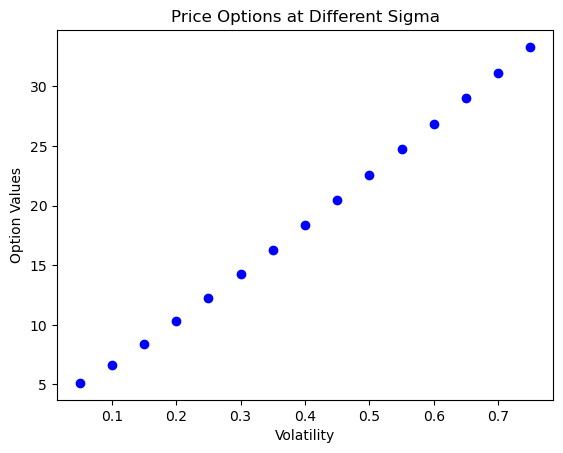

In [47]:
fig, ax = plt.subplots()
ax.scatter(df['Volatility'], df['Option Values'], marker='o', c='blue')
ax.set_title('Price Options at Different Sigma')

ax.set_xlabel('Volatility')
ax.set_ylabel('Option Values')

plt.show()

In [51]:
import pandas as pd

time_movement = np.arange(4, 50, 1)
time_delta = []
header = ['Time', 'Option Price']

for time in time_movement:
    time_deltas = binomial_option(100, 100, 0.05, 0.2, time, 4, 3)
    time_delta.append([time, time_deltas[0,0]])

df_time = pd.DataFrame(time_delta, columns=header)
print(df_time)

    Time  Option Price
0      4        0.7273
1      5        0.7482
2      6        0.7659
3      7        0.7813
4      8        0.7949
5      9        0.8070
6     10        0.8179
7     11        0.8279
8     12        0.8370
9     13        0.8454
10    14        0.8532
11    15        0.8604
12    16        0.8672
13    17        0.8735
14    18        0.8795
15    19        0.8852
16    20        0.8905
17    21        0.8956
18    22        0.9004
19    23        0.9050
20    24        0.9094
21    25        0.9136
22    26        0.9176
23    27        0.9214
24    28        0.9251
25    29        0.9287
26    30        0.9321
27    31        0.9354
28    32        0.9386
29    33        0.9416
30    34        0.9446
31    35        0.9474
32    36        0.9502
33    37        0.9528
34    38        0.9554
35    39        0.9579
36    40        0.9603
37    41        0.9626
38    42        0.9649
39    43        0.9671
40    44        0.9692
41    45        0.9712
42    46   

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['Time'], df['Option Price'], marker='o', c='blue')
ax.set_title('Price Options at Different Sigma')

ax.set_xlabel('Volatility')
ax.set_ylabel('Option Values')

plt.show()